# The Euler method for numerical integration

- [Introduction](#intro)
- [Ordinary differential equations (ODE)](#ode)
    - [1st order ODE](#1ode)
    - [Numerical calculation](#calculation)
- [A very simple problem](#problem)
    - [Euler Method](#euler)
    - [Leap-frog method](#leapfrog)
    - [Runge-Kutta 2nd order](#runge2)
    - [Runge-Kutta 4th order](#runge4)
- [Extra](#extra)

<div id="intro" />

## Introduction

The Euler method for numerical integration is the most basic explicit method for numerically solving ordinary differential equations. Although many other methods with higher accuracy have been proposed, the simplicity of the Euler method makes it ideal when studying the subject for the first time. We will use it to simulate the motions of Brownian particles.

<div id="ode" />

##  Ordinary differential equations (ODE)

<div id="1ode" />

### 1st order ODE

Consider the following 1st order differential equation.

$$
\frac{dy(t)}{dt}=f(y(t),t) \tag{A1}
$$

Assume that the initial conditions are $y=y_0$ at time $t=t_0$. We need to determine $y(t)$, for any $t \ge t_0$.

#### Formal solution

Integrate Eq.(A1) over time, from $0\rightarrow t$, to obtain the formal solution for $y(t)$

$$
y(t)=y_0+\int_{{{t}_{0}}}^{t}{}\,d{t}'f(y({t}'),{t}') \tag{A2}
$$

Let us consider an ordinary differential equation, shown here in Eq.(A1). We want to know the temporal values of $y$ for any time $t$, under the initial condition $y=y_0$ at $t=t_0$. 

First, let us write down the formal solutions of the differential equation by integrating Eq.(A1) in time, from $t_0$ to $t$. Eq. (A2) gives the exact value of $y$ at any given time $t$, starting from the initial condition of $y_0$ at $t=0$. However, an analytical evaluation of the time integrals is only possible for very limited cases. In most situations, we must solve these differential equations numerically. The Euler method is the simplest method for performing this numerical integration.

<div id="calculation" />

### Numerical calculation

#### Discretization

Divide the total time span $t_0\rightarrow t$ into $N$ equally spaced segments, each describing a time increment $\Delta t$.

![](images/discretize.png) 
$$
t_i\equiv t_0+i\Delta t,\ \ \ \ 
y_i\equiv y(t_i),\ \ \ \ 
f_i\equiv f(t_i,y(t_i))\tag{A3}
$$

To solve differential equations numerically using computers, we must first discretize the time axis. We divide the total time span, from $t_0$ to $t$, into $N$ equally spaced segments, each describing a short time increment $\Delta t$, and define the following discrete variables.

#### Advancing the solution forward a small step $\Delta t$

Integrate Eq.(A1) over a small time interval, from $t_i \rightarrow t_{i+1}(=t_i+\Delta t)$,

$$
y_{i+1} 
=y_i+\int_{{{t}_{i}}}^{t_{i+1}}{}\,d{t}'\,f(y({t}'),{t}') \hspace{50mm}\tag{A3}
$$
$$
= y_i+\int_{0}^{\Delta t}\,d{\tau}\,f(y({t_i+\tau}),t_i+\tau)\ \ \ \ \ \ \ \ (\tau\equiv t'-t_i)\tag{A4}
$$
$$
= y_i+\int_{0}^{\Delta t}\,d{\tau}\,\left[f_i+\mathcal{O}(\tau)+\mathcal{O}(\tau^2)+\cdots)\right]\hspace{14mm}\tag{A5}
$$
$$
= y_i+\left[\tau\, f_i+\mathcal{O}(\tau^2)+\mathcal{O}(\tau^3)+\cdots)\right]_{0}^{\Delta t} \hspace{23mm}\tag{A6}
$$

$$
= y_i+\Delta t \,f_i+\mathcal{O}(\Delta t^2)+\mathcal{O}(\Delta t^3)+\cdots \hspace{23mm}\tag{A7}
$$

Now consider how to perform the integration over a small time increment $\Delta t$,  from $t_i$ to $t_{i+1}$. Using the Taylor expansion, we expand the integrand around $t_i$, in increasing powers of $\tau$, where $\tau = t^\prime - t_i$. For simplicity, we only explicitly write the zero-th order term, proportional to $f_i$. The integrals can be performed analytically, with each term one order in $\Delta t$ higher than the previous one.

<div id="problem" />

## A very simple problem

Numerically solve the following differential equation and determine $y(t)$ for $0\le t\le 10$ with the initial condition $y=1$ at $t=0$. Then compare it with the analytical solution $y=\exp(-t)$.

$$
\frac{dy(t)}{dt}=-y(t) \tag{A22}
$$

Let us consider a very simple problem here and try to apply the Euler method to numerically solve it. We want to numerically solve the following differential equation and determine $y(t)$ for $0\le t\le 10$, with initial condition $y=1$ at $t=0$. Then we compare it with the analytical solution $y=\exp(-t)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

<div id="euler" />

### Euler method

- Difference equation $\rightarrow$ 1st order in $\Delta t$


$$
y_{i+1} = y_i+\Delta t \,f_i \tag{A8}
$$

- Simulation procedure $\rightarrow$ Explicit method

$$
y_0, f_0 \xrightarrow[\Delta t]{\rm Eq.(A8)}
y_1, f_1 \xrightarrow[\Delta t]{\rm Eq.(A8)}
\cdots
y_i, f_i 
\cdots
\xrightarrow[\Delta t]{\rm Eq.(A8)}\tag{A9}
y_N, f_N 
$$

- Forward difference approximation (1st order)

$$
\left.\frac{dy(t)}{dt}\right|_{t=t_i}\simeq\frac{y_{i+1}-y_i}{\Delta t}\tag{A10}
$$

In the limit when the time increment $\Delta t\rightarrow 0$, we can neglect all terms in Eq.(A7) of second order or higher. This first order approximation is known as the Euler method, shown here as Eq.(A8). By repeatedly applying Eq.(A8) $N$ times, we can obtain an approximation of $y$ at a given time $t=N \Delta t$. This process is schematically shown in Eq.(A9).

The Euler method is a first-order method, which means that the local error (the error per step) is proportional to the square of the step size, and the global error (the error at a given time $t$) is proportional to the step size. Although simple and not very accurate itself, the Euler method serves as the basis to construct more accurate methods. 

From Eqs.(A1) and (A8), it is straightforward to solve for $f$, and to recognize that the Euler method is a forward difference approximation to the derivative of $y$, as defined in Eq. (A10).

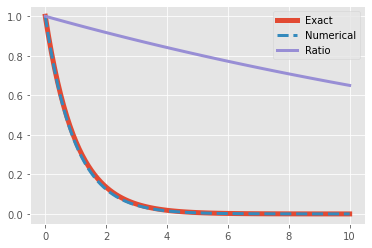

In [2]:
# Euler method
dt, tmin, tmax = 0.1, 0.0, 10.0 # set \Delta t,t0,tmax
step = int((tmax-tmin)/dt)
# create array t from tmin to tmax with equal interval dt 
t  = np.linspace(tmin, tmax, step)
y  = np.zeros(step) # initialize array y as all 0
ya = np.exp(-t) # analytical solution y = exp(-t)
plt.plot(t, ya, label="Exact", lw=5)

y[0] = 1.0 # initial condition
for i in range(step-1):
    y[i+1] = y[i] - dt*y[i] # Euler method Eq.(A8)
    
plt.plot(t, y, ls="--", lw=3, label="Numerical") # plot y vs t (numerical)
plt.plot(t, y/ya, lw=3, label="Ratio") # plot y/ya vs. t
plt.legend()
plt.show()

<div id="leapfrog" />

### Leap-frog method

- Central difference approximation

$$
\left.\frac{dy(t)}{dt}\right|_{t=t_i}\simeq\frac{y_{i+1}-y_{i-1}}{2\Delta t}\tag{A11}
$$

- Difference equation, Substitute Eq.(A11) in Eq.(A1)

$$
y_{i+1} = y_{i-1}+2\Delta t \,f_i \tag{A12}
$$

- Simulation procedure $\rightarrow$ Explicit method

$$
y_{-1}, f_0 \xrightarrow[\ \ \ 2\Delta t\ \ \ ]{\rm Eq.(A11)}
y_1, f_2 \xrightarrow[2\Delta t]{\rm Eq.(A11)}
\cdots
y_i, f_{i+1} 
\cdots
\xrightarrow[2\Delta t]{\rm Eq.(A11)}
y_N  \tag{A13}
$$

$$
y_{0}, f_1 \xrightarrow[2\Delta t]{\rm Eq.(A11)}
y_2, f_3 \cdots
\xrightarrow[2\Delta t]{\rm Eq.(A11)}
y_{N-1}, f_{N} \tag{A14}
$$

Instead of using the forward difference approximation of the Euler method, we can use a centered difference, to design a higher-order (more accurate) integration method.

The central difference approximation given by Eq. (11) estimates the derivative of $y$ at step $i$, in terms of the $y$ values at steps $i-1$ and $i+1$. Substituting Eq.(A11) into Eq.(A1), we obtain the difference equation referred to as the Leapfrog method, shown in Eq. (12).

This integration scheme gives a method that is accurate to second order in $\Delta t$ (this means the error is $\mathcal{O}(\Delta t^3)$). The simulation procedure corresponding to the Leapfrog method is schematically represented in Eqs. (A13) and (A14).

In contrast to the Euler method, the difference equation for the Leapfrog method (Eq. (A12)) involves values of $y$ and $f$ at distinct times. In this case $i$ and $i-1$, respectively. 

<div id="runge2" />

### Runge-Kutta 2nd order

- Difference equation

$$
y\,'_{i+\frac{1}{2}} = y_i+\frac{1}{2}\Delta t \,f_i  \hspace{50mm}{\rm (Euler)} \tag{A15}
$$

$$
y_{i+1} = y_i+\Delta t \,f(t_{i+\frac{1}{2}},y\,'_{i+\frac{1}{2}})
 = y_i+\Delta t \,f\,'_{i+\frac{1}{2}} \hspace{15mm}{\rm (Leapfrog)}\tag{A16}
$$

- Simulation procedure $\rightarrow$ Explicit method

$$
y_{0}, f_{0} \xrightarrow[\ \ \ \frac{1}{2}\Delta t\ \ \ ]{\rm Eq.(A15)}
y\,'_{\frac{1}{2}}, f\,'_{\frac{1}{2}}
\hspace{15mm}
y_i, f_{i} 
\xrightarrow[\frac{1}{2}\Delta t]{\rm Eq.(A15)}
y\,'_{i+\frac{1}{2}}, f\,'_{i+\frac{1}{2}} 
\hspace{60mm} 
$$
$$
y_{1}, f_{1} \xrightarrow[\ \ \ \frac{1}{2}\Delta t\ \ \ ]{\rm Eq.(A15)}
y\,'_{1+\frac{1}{2}}, f\,'_{1+\frac{1}{2}} 
\hspace{8mm} \cdots
\xrightarrow[\frac{1}{2}\Delta t]{\rm Eq.(A15)}
y\,'_{N-\frac{1}{2}}, f\,'_{N-\frac{1}{2}} \hspace{20mm}\ 
$$

$$
y_{0}, f\,'_{\frac{1}{2}} \xrightarrow[\ \ \ \Delta t\ \ \ ]{\rm Eq.(A16)}
y_1, f\,'_{1+\frac{1}{2}} \xrightarrow[\Delta t]{\rm Eq.(A16)}
\cdots
y_i, f\,'_{i+\frac{1}{2}} 
\cdots
\xrightarrow[\Delta t]{\rm Eq.(A16)}
y_N  \tag{A17}
$$

Here we have written down the difference equations for a 2nd order Runge-Kutta method. The first Eq.(A15) represents an intermediate operation, to estimate $y_{i+\frac{1}{2}}$ and $f_{i+\frac{1}{2}}$ at the midpoint, using the Euler method. The second equation represents the main operation, where $y_{i+1}$ is calculated using a Leapfrog like method, with $f$ evaluated at the midpoint. This particular method is second order in $\Delta t$, like the Leapfrog method, but higher order Runge-Kutte methods can be easily derived.

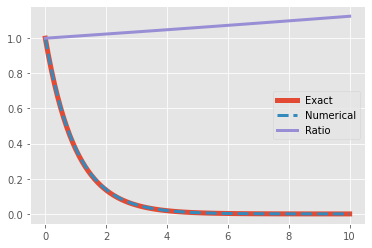

In [3]:
# Runge-Kutta 2nd
dt, tmin, tmax = 0.1, 0.0, 10.0 # set \Delta t, t0, tmax
step = int((tmax-tmin)/dt)
# create array t from tmin to tmax with equal interval dt 
t = np.linspace(tmin, tmax, step)
y = np.zeros(step)
y1 = np.zeros(step)
ya = np.exp(-t)
plt.plot(t, ya, lw=5, label="Exact")
y[0] = 1.0

for i in range(step-1):
    y1[i] = y[i] - 0.5*dt*y[i] # Runge-Kutta Eq.(A15)
    y[i+1] = y[i] - dt*y1[i] # Runge-Kutta Eq.(A16)
    
plt.plot(t, y, lw=3, ls="--", label="Numerical")
plt.plot(t, y/ya, lw=3, label="Ratio")
plt.legend()
plt.show()

<div id="runge4" />

### Runge-Kutta 4th order

- Difference equation

$$
y\,'_{i+\frac{1}{2}}=y_i+\frac{\Delta t}{2}f_i,\hspace{20mm}
f\,'_{i+\frac{1}{2}}= f(y\,'_{i+\frac{1}{2}},t_{i+\frac{1}{2}}) \tag{A18}
$$

$$
y\,''_{i+\frac{1}{2}}=y_i+\frac{\Delta t}{2}f\,'_i,\hspace{20mm}
f\,''_{i+\frac{1}{2}}= f(y\,''_{i+\frac{1}{2}},t_{i+\frac{1}{2}}) \tag{A19}
$$

$$
y\,'''_{i+1}=y_i+{\Delta t}f\,''_{i+\frac{1}{2}},\hspace{20mm}
f\,'''_{i+1} = f(y\,'''_{i+1},t_{i+1}) \tag{A20}
$$

$$
y_{i+1} = y_i+\frac{1}{6}\Delta t \left[
f_i+2f\,'_{i+\frac{1}{2}}+2f\,''_{i+\frac{1}{2}}+f\,'''_{n+1}
\right]\tag{A21}
$$

In fact, the most popular Runge-Kutta method is the 4th order method we present now. The appropriate difference equations for this scheme are given in Eqs. (A18)-(A21).

The first three Eqs.(A18)-(A20) represent intermediate operations to estimate tentative values for $y$ and $f$ using the Euler method. The 4th equation is the main operation, where $y_{i+1}$ is calculated using the intermediate values of $f$ obtained previously. This method is fourth order in $\Delta t$, which means that the error is $\mathcal{O}(\Delta t^5)$.

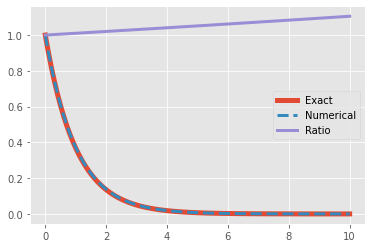

In [4]:
# Runge-Kutta 4th
dt,tmin,tmax =0.1,0.0,10.0
step = int((tmax-tmin)/dt)
# create array t from tmin to tmax with equal interval dt
t = np.linspace(tmin,tmax,step)
y = np.zeros(step)
y1 = np.zeros(step)
y2 = np.zeros(step)
y3 = np.zeros(step)
ya = np.exp(-t)

plt.plot(t, ya, lw=5, label="Exact")
y[0] = 1.0 # initial condition

for i in range(step-1):
    y1[i] = y[i] - 0.5*dt*y[i] # Runge-Kutta Eq.(A18)
    y2[i] = y[i] - 0.5*dt*y1[i] # Runge-Kutta Eq.(A19)
    y3[i] = y[i] - dt*y2[i] # Runge-Kutta Eq.(A20)
    # Runge-Kutta Eq.(A21)
    y[i+1] = y[i] - dt*(y[i] + 2.0*y1[i] + 2.0*y2[i] + y3[i])/6.0
    
plt.plot(t, y, lw=3, ls="--", label="Numerical")
plt.plot(t, y/ya, lw=3, label="Ratio")
plt.legend()
plt.show()

<div id="extra" />

## Extra

1. Compare the Euler method with the Taylor expansion

$$
y_{i+1}=y_i+\Delta t \frac{dy}{dt}+\frac{\Delta t^2}{2} \frac{d^2y}{dt^2}+\frac{\Delta t^3}{3} \frac{d^3y}{dt^3}+\cdots
$$

to find the order of the method in terms of $\Delta t$.

2. Compare the Leapfrog method with the Taylor expansion to find the order of the method in terms of $\Delta t$.
1. Use the code example for the Euler method and examine the amplitude of the numerical errors (i.e. deviations of y/ya from 1), by changing the time increment to dt=0.01, 0.05, 0.1, 0,5, and 0.9.
1. Perform the same error analysis for the Runge-Kutta (2nd order) method by modifing the code example for the Euler method.
1. Perform the same error analysis for the Runge-Kutta (4th order) method.


1. Euler method:

$$
y_{i+1}=y_i+\Delta t f_i=y_i+\Delta t \left.\frac{dy}{dt}\right|_{i}\tag{AH1}
$$

Taylor expansion ($+\Delta t$):

$$
y_{i+1}=y_i+\Delta t \left.\frac{dy}{dt}\right|_{i}+\frac{\Delta t^2}{2} \left.\frac{d^2y}{dt^2}\right|_{i}+\left.\frac{\Delta t^3}{3} \frac{d^3y}{dt^3}\right|_{i}+\cdots
\tag{AH2}
$$
$\rightarrow$ 1st order



2. Leapfrog method:

$$
y_{i+1}=y_{i-1}+2\Delta t f_i=y_i+2\Delta t \left.\frac{dy}{dt}\right|_{i}\tag{AH3}
$$

Taylor expansion ($-\Delta t$):

$$
y_{i-1}=y_i-\Delta t \left.\frac{dy}{dt}\right|_{i}+\frac{\Delta t^2}{2} \left.\frac{d^2y}{dt^2}\right|_{i}-\left.\frac{\Delta t^3}{3} \frac{d^3y}{dt^3}\right|_{i}+\cdots\tag{AH4}
$$
Eq.(AH2)-Eq.(AH4) gives
$$
y_{i+1}=y_{i-1}+2\Delta t \left.\frac{dy}{dt}\right|_{i}
- 0 
+\left.\frac{2\Delta t^3}{3} \frac{d^3y}{dt^3}\right|_{i}+\cdots\tag{AH5}
$$
$\rightarrow$ 2nd order